In [14]:
%matplotlib inline
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import os                 


In [21]:
#import file using pandas
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

#read city and ride  data
city_df =pd.read_csv(city_file)
ride_df =pd.read_csv(ride_file)

#drop one duplicate record with same city name, same ride_ids but different # of drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')
                           
  

In [22]:
#merged_df.head()

In [23]:
#color scheme dictionary and preview
color_scheme ={'Gold':'#FFD700','Light Sky Blue':'#87CEFA','Light Coral':'#F08080'}
# sns.palplot(sns.color_palette(color_scheme.values()))    
#plt.show()               
               

In [32]:
# city type data
city_type = city_df.set_index('city')['type']


In [33]:
txt = "Bubble Plot of Ride Sharing Data"
x = txt.title()
print(x)

#group be city name
by_city =merged_df.groupby('city')

# var holding avg fare by city
avg_fare = by_city.mean()['fare']

# var holding rides by city
ride_count = by_city['ride_id'].count()

# num of drivers
driver_count = by_city.mean()['driver_count']


Bubble Plot Of Ride Sharing Data


In [34]:

# dataframe from above series

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})  
 

In [36]:
city_info.sort_values('Number of Drivers', ascending = False)


,Number of Rides,Average Fare,Number of Drivers,Type of City
West Samuelburgh,25,21.767600,73.0,Urban
South Michelleport,31,24.451613,72.0,Urban
West Anthony,30,24.736667,70.0,Urban
Liumouth,33,26.150000,69.0,Urban
Port Angela,19,23.836842,67.0,Urban
Reynoldsfurt,19,21.919474,67.0,Urban
East Kaylahaven,29,23.757931,65.0,Urban
Royland,30,20.570667,64.0,Urban
Jerryton,25,25.649200,64.0,Urban
Grahamburgh,25,25.221200,61.0,Urban


In [54]:
#separated dfs for city categories
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']
city_color = {'Urban': color_scheme['Gold'],'Suburban': color_scheme['Light Sky Blue'], 'Rural':color_scheme['Light Coral']}


In [63]:

plt.suptitle('Pyber Ride Sharing Data')


Text(0.5, 0.98, 'Pyber Ride Sharing Data')

<Figure size 432x288 with 0 Axes>

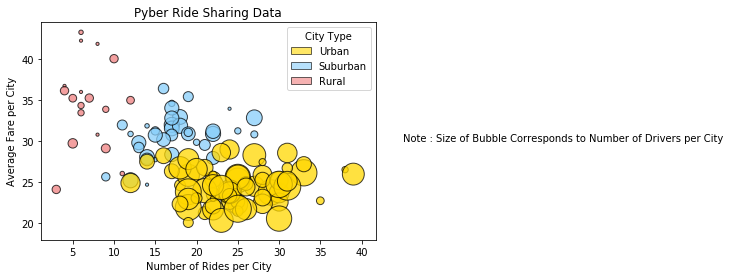

In [132]:

# three scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Pyber Ride Sharing Data')
plt.text(45,30,'Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')

import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black", linewidth=1)

plt.legend([U, S, R],["Urban", "Suburban", "Rural"], title="City Type")

plt.show()


In [112]:
txtFares = "Total Fares by City Type"
x = txtFares.title()
print(x)


#group by type to be used by all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']


Total Fares By City Type


In [113]:
#total fare by city
fare_sum = by_type.sum()['fare']


In [114]:
#pie chart build
labels = fare_sum.index


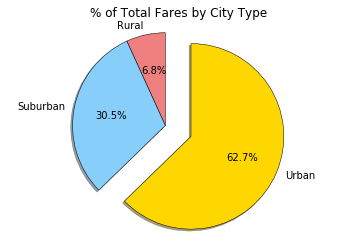

In [120]:
#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## Total Rides by City Type

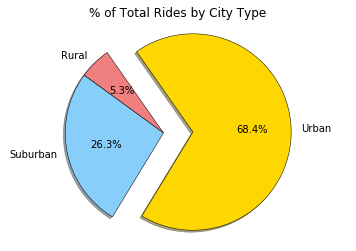

In [130]:

# number of ride per city type
ride_sum = by_type.count()['ride_id']

# Calculate Ride Percents
labels = ride_sum.index
plt.pie(ride_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Show Figure
plt.show()

# Save Figure


## Total Drivers by City Type

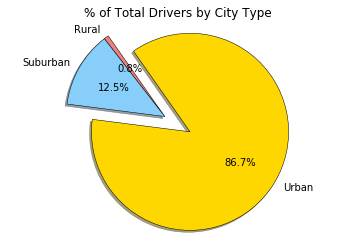

In [131]:
# Calculate Driver Percentsave FiguDrivers by City Type

# of driver per city type
driver_sum = by_type.sum()['driver_count']

# Build Pie Charts
labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

# Show Figure
plt.show()


# Save Figure
